### Thesis notebook to show descriptive analysis of post processing data and Linear Regression on the data with only Psychological Factors

In [60]:
# import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [61]:
# Import the dataset
data = pd.read_csv("demo_factors_ohe.csv")

data

,18-24,25-34,35-44,45-54,55-64,65,Female,Gender Variant/Non-Conforming,Male,College,...,White or Caucasian,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency,Present Bias
0,0,0,1,0,0,0,1,0,0,0,...,0,4,2,10,9,10,9,8,2,1
1,0,1,0,0,0,0,1,0,0,0,...,1,6,2,7,10,9,7,8,1,1
2,0,1,0,0,0,0,0,1,0,0,...,1,4,2,6,8,8,8,7,1,1
3,0,1,0,0,0,0,0,0,1,0,...,0,5,2,10,10,10,10,10,2,0
4,1,0,0,0,0,0,0,0,1,0,...,1,5,2,10,10,10,10,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,0,0,0,0,0,1,0,0,0,...,1,3,2,10,10,10,10,6,3,0
182,1,0,0,0,0,0,0,0,1,0,...,1,3,2,8,10,7,10,7,2,1
183,1,0,0,0,0,0,1,0,0,1,...,1,6,2,10,8,8,8,7,2,1
184,0,0,0,1,0,0,0,0,1,1,...,1,6,2,10,6,6,6,10,3,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   18-24                          186 non-null    int64
 1   25-34                          186 non-null    int64
 2   35-44                          186 non-null    int64
 3   45-54                          186 non-null    int64
 4   55-64                          186 non-null    int64
 5   65                             186 non-null    int64
 6   Female                         186 non-null    int64
 7   Gender Variant/Non-Conforming  186 non-null    int64
 8   Male                           186 non-null    int64
 9   College                        186 non-null    int64
 10  Elementary School              186 non-null    int64
 11  Graduate School                186 non-null    int64
 12  High School                    186 non-null    int64
 13  Prefer Not to Answer

In [63]:
data.describe()

,18-24,25-34,35-44,45-54,55-64,65,Female,Gender Variant/Non-Conforming,Male,College,...,White or Caucasian,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency,Present Bias
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.00000,186.000000,186.000000
mean,0.548387,0.301075,0.096774,0.037634,0.010753,0.005376,0.639785,0.010753,0.349462,0.322581,...,0.376344,4.596774,1.913978,9.365591,8.806452,8.833333,8.892473,8.27957,1.876344,0.666667
std,0.498996,0.459963,0.296448,0.190824,0.103415,0.073324,0.481358,0.103415,0.478087,0.468725,...,0.485776,1.312637,0.349700,1.146416,1.550993,1.390767,1.444186,1.52362,0.812590,0.472677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,4.000000,2.000000,3.000000,4.000000,3.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,2.000000,9.000000,8.000000,8.000000,8.000000,7.00000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,2.000000,10.000000,9.000000,9.000000,9.000000,8.00000,2.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,6.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.00000,2.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,6.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.00000,3.000000,1.000000


In [64]:
data.columns

Index(['18-24', '25-34', '35-44', '45-54', '55-64', '65', 'Female',
       'Gender Variant/Non-Conforming', 'Male', 'College', 'Elementary School',
       'Graduate School', 'High School', 'Prefer Not to Answer',
       'Asian or Pacific Islander', 'Black or African American',
       'Hispanic or Latino', 'Indian', 'Two or more races',
       'White or Caucasian', 'MFA Familiarity Count', 'Security Beliefs',
       'Security Importance', 'Quick Log In Importance',
       'Log In Usability Importance', 'Log In Convenience Importance',
       'Log In Satisfaction', 'MFA Opt In Frequency', 'Present Bias'],
      dtype='object')

In [65]:
sns.pairplot(data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe8794ca940> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# distribution of the target
sns.distplot(data['MFA Opt In Frequency'])

<AxesSubplot:>

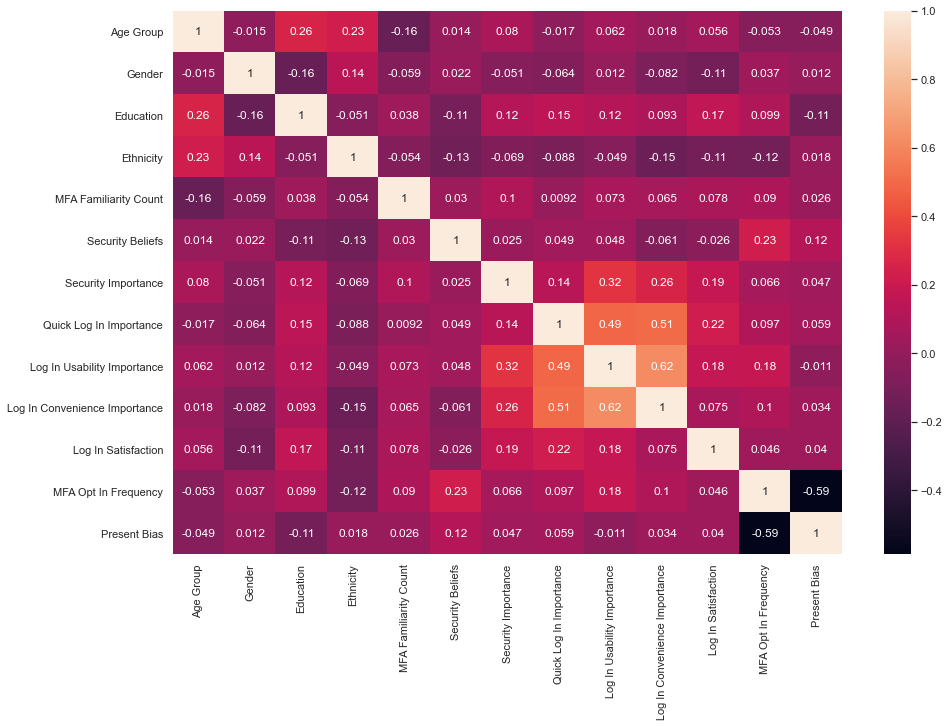

In [147]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot=True)

In [66]:
data.columns

Index(['18-24', '25-34', '35-44', '45-54', '55-64', '65', 'Female',
       'Gender Variant/Non-Conforming', 'Male', 'College', 'Elementary School',
       'Graduate School', 'High School', 'Prefer Not to Answer',
       'Asian or Pacific Islander', 'Black or African American',
       'Hispanic or Latino', 'Indian', 'Two or more races',
       'White or Caucasian', 'MFA Familiarity Count', 'Security Beliefs',
       'Security Importance', 'Quick Log In Importance',
       'Log In Usability Importance', 'Log In Convenience Importance',
       'Log In Satisfaction', 'MFA Opt In Frequency', 'Present Bias'],
      dtype='object')

In [68]:
X = data[['18-24', '25-34', '35-44', '45-54', '55-64', '65', 'Female',
       'Gender Variant/Non-Conforming', 'Male', 'College', 'Elementary School',
       'Graduate School', 'High School', 'Prefer Not to Answer',
       'Asian or Pacific Islander', 'Black or African American',
       'Hispanic or Latino', 'Indian', 'Two or more races',
       'White or Caucasian', 'MFA Familiarity Count', 'Security Beliefs',
       'Security Importance', 'Quick Log In Importance',
       'Log In Usability Importance', 'Log In Convenience Importance',
       'Log In Satisfaction', 'MFA Opt In Frequency'
       ]]

In [69]:
y = data['Present Bias']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =101)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lm = LinearRegression()

In [74]:
lm.fit(X_train, y_train)

LinearRegression()

In [75]:
# print the intercept
print(lm.intercept_)

-0.30632392425577815


In [76]:
lm.coef_

array([ 0.12680523,  0.13614371,  0.0511381 , -0.31042748,  0.15661365,
       -0.1602732 ,  0.10694471, -0.23051888,  0.12357417,  0.06183854,
       -0.31604615,  0.05090279,  0.10931788,  0.09398694,  0.02983071,
        0.02755095,  0.04970621,  0.02615606, -0.20159619,  0.06835225,
        0.00995591,  0.43797811, -0.00401645,  0.01074189,  0.01200055,
        0.02883577,  0.01226542, -0.40460901])

In [77]:
X_train.columns

Index(['18-24', '25-34', '35-44', '45-54', '55-64', '65', 'Female',
       'Gender Variant/Non-Conforming', 'Male', 'College', 'Elementary School',
       'Graduate School', 'High School', 'Prefer Not to Answer',
       'Asian or Pacific Islander', 'Black or African American',
       'Hispanic or Latino', 'Indian', 'Two or more races',
       'White or Caucasian', 'MFA Familiarity Count', 'Security Beliefs',
       'Security Importance', 'Quick Log In Importance',
       'Log In Usability Importance', 'Log In Convenience Importance',
       'Log In Satisfaction', 'MFA Opt In Frequency'],
      dtype='object')

In [78]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [79]:
cdf

,Coeff
18-24,0.126805
25-34,0.136144
35-44,0.051138
45-54,-0.310427
55-64,0.156614
65,-0.160273
Female,0.106945
Gender Variant/Non-Conforming,-0.230519
Male,0.123574
College,0.061839


Interpreting the coefficients:

• Holding all other features fixed, a 1 unit increase in <b>Security Beliefs</b> is associated with an *increase of 0.416813 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Security Importance</b>	is associated with an *increase of 0.002014 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Quick Log In Importance</b>	is associated with an *increase of 0.003918 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Log In Usability Importance</b>	is associated with an *increase of 0.007886 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Log In Convenience Importance</b> is associated with an *increase of 0.035955 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Log In Satisfaction</b>	is associated with an *increase of 0.016278 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>MFA Opt In Frequency</b> is associated with an *decrease of 0.398865 Present Bias*.


In [80]:
predictions = lm.predict(X_test)
predictions # predictions of our model for Present Bias

array([ 0.34604813,  0.38459503,  0.98398733,  0.36619998,  0.58150931,
        1.10640305,  0.31544277,  1.07672352, -0.27236405,  0.7575729 ,
        0.20517594,  1.1153223 ,  1.46487371,  0.27900498,  1.02303816,
        0.64240951,  0.63036109,  0.36220988,  1.07880761,  1.06044055,
        1.17470576,  0.32897912,  0.32289709,  1.13945935,  0.20977004,
        0.40884152,  0.81653463,  0.32462037,  1.06619826,  1.02704008,
        0.36451938,  1.1544789 ,  0.72769819,  0.60999424,  0.98083514,
        0.48470154,  0.69640325,  0.31295222])

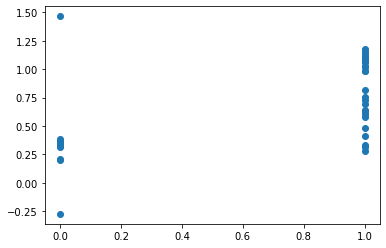

In [81]:
plt.scatter(y_test,predictions)

#### Residual Histogram

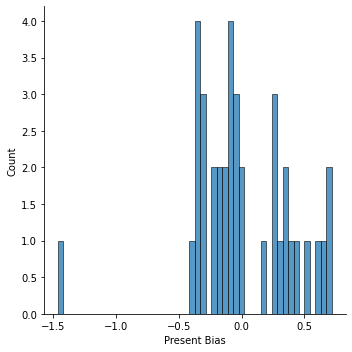

In [82]:
sns.displot((y_test-predictions), bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [83]:
from sklearn import metrics

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.30840918279452795
MSE: 0.16603217869931214
RMSE: 0.4074704635913039


In [85]:
lm.score(X_test, y_test)

0.2315690190967733